In [1]:
# Step 1: Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# For model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Step 2: Load the Dataset

df= pd.read_csv('data/diabetes.csv')

In [4]:
# Brief overview of the Dataset

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum()) 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [5]:
# Step 3: Data cleaning and preprocessing

# Even though there are no empty values their are some columns like (Glucose, BloodPressure, SkinThickness, BMI, etc) that is zero and invalid medically.

# Replace zeros with NaN

invalid_cols= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[invalid_cols]=df[invalid_cols].replace(0, np.nan)

print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


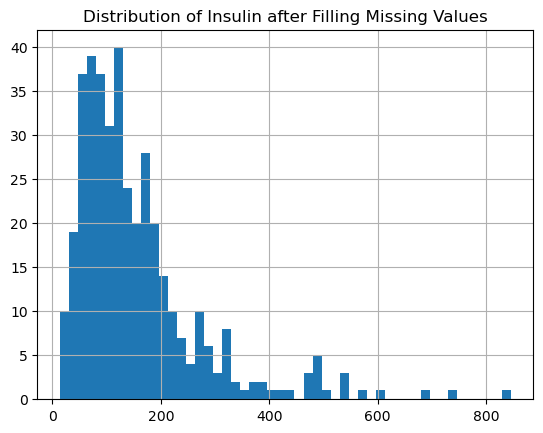

In [6]:
# Visualization of some comlumns before filling missing values

df['Insulin'].hist(bins=50)
plt.title('Distribution of Insulin after Filling Missing Values')
plt.show()

In [7]:
# Handling missing values (filling na with median values)(mean pulls itself away from the center due to outliers, it can be used when data is symmetric)

df.fillna(df.median(), inplace=True)

print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


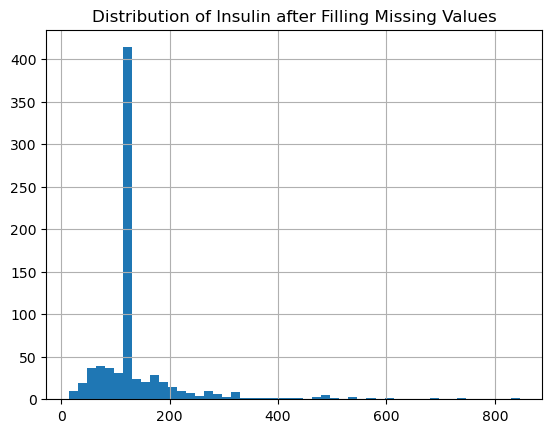

In [8]:
# Visualization of some columns after filling missing values

df['Insulin'].hist(bins=50)
plt.title('Distribution of Insulin after Filling Missing Values')
plt.show()

In [10]:
# Step 4: Feature Engineering

#encode categorical variables into numerical as logistic regression requires numerical data
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

X=df.drop('Outcome', axis=1)
y= df['Outcome']

scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
# Step 5: Train-test splitting

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training samples: ", X_train.shape[0])
print("Testing samples: ", X_test.shape[0])

Training samples:  614
Testing samples:  154


In [13]:
# Step 6: Model building

model= LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Step 7: Evaluation of the Model

y_pred=model.predict(X_test)

print("Accuracy: \n",accuracy_score(y_test,y_pred))

print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))

print("Classification Report:\n ", classification_report(y_test, y_pred))

Accuracy: 
 0.7532467532467533
Confusion Matrix: 
 [[82 17]
 [21 34]]
Classification Report:
                precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



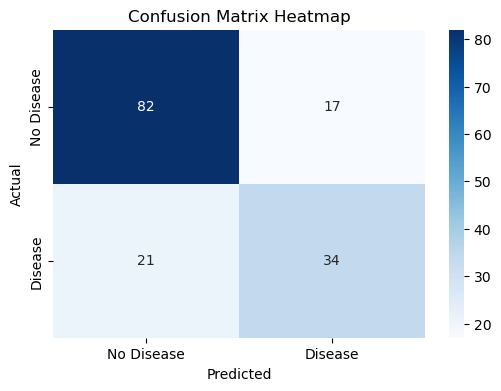

In [16]:
# Visualizing results using confusion matrix heatmap and ROC Curve

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix Heatmap")
plt.show()

AUC Score:  0.8229568411386594


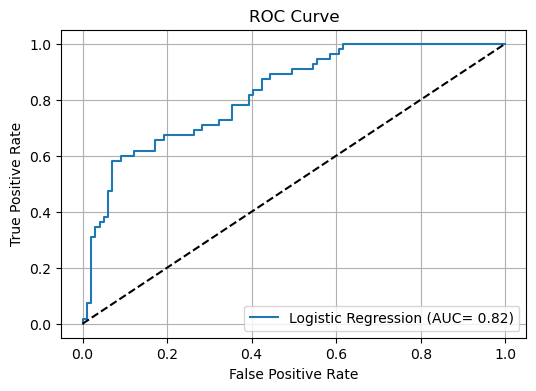

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds= roc_curve(y_test,y_prob)

auc_score= roc_auc_score(y_test, y_prob)
print("AUC Score: ",auc_score)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label= f'Logistic Regression (AUC= {auc_score:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()